In [ ]:
from pymatgen.ext.matproj import MPRester

In [2]:
import subprocess

In [3]:
import os

In [4]:
import pymatgen.io.vasp.inputs as inp

In [5]:
import pandas as pd

In [6]:
import re

In [8]:
work_dir = "YOUR_OWN_WORK_DIR"
os.chdir(work_dir)

In [9]:
def get_all_folders(directory):
    folder_names = []
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            print(dir_name)
            folder_names.append(dir_name)
    return folder_names

In [10]:
chemicals = get_all_folders(work_dir)

Hf
SnCl2
CaCl2
BiCl3
NiCl2
Mg
CuCl2
IrCl3
PdCl2
Fe
Sn
Ir
MgCl2
FeCl3
RuCl3
Mn
Bi
HfCl4
MoCl5
TaCl5
NaH
NaCl
Ru
Ni
MnCl2
RhCl3
Co
CoCl2
Pt
Pd
VCl3
Ta
Cu
Mo
Ca
Rh
V
LaCl3
PtCl4
La


In [22]:
def grep_lines_with_keyword(keyword, filepath):
    matching_lines = []
    with open(filepath, 'r') as file:
        for line in file:
            if keyword in line:
                matching_lines.append(line.rstrip('\n'))
    return matching_lines

In [25]:
#chemicals = ["Co", "CoCl2",  "Fe",  "FeCl3",  "Ir",  "IrCl3",  "Mo",  "MoCl5",  "NaCl",  "NaH",  "Ni",  "NiCl2",  "Pd",  "PdCl2",  "Rh",  "RhCl3",  "Ru",  "RuCl3",  "V", "VCl3"]
#chemicals = ["VCl3"]
df = pd.DataFrame(columns = ["G", "G_fu"])
for chemical in chemicals:
    print("Now I am working on: " + chemical)
    chemical_result_dir = work_dir + "/" + chemical + "/" + "OUTCAR"
    with open(chemical_result_dir, 'r') as file:
        content = file.read()

        search_terms = ['reached required accuracy']
        keyword = "TOTEN"
        
        found_terms = []
        for term in search_terms:
            if term in content:
                found_terms.append(term)
                
# if the calculation has come to converge, then get the final energy
        if search_terms[0] in found_terms:
            print("Get converged")
            # get the consistent energy for each step
            matching_lines = grep_lines_with_keyword(keyword, chemical_result_dir)

            # if there is correctly calculated consistent energy, print it out
            if matching_lines:
                line = matching_lines[-1]
                print(line)
            # grap the final energy and turn into float
                energy = float(re.split(' ', line)[-2])
                print("The internal energy of "+ chemical + "is: " + str(energy))
            # save the data into dataframe
                df.loc[chemical, "G"] = energy
            # the total energy needs to be divided by the coefficients
                POSCAR_dir = work_dir + "/" + chemical + "/" + "POSCAR"
                POSCAR_file = pd.read_csv(POSCAR_dir)
                #elements = list(df.iloc[4,0].split())
                atom_n = re.findall(r'\d+',POSCAR_file.iloc[5,0])
                
                coefficient = float(atom_n[0])
                df.loc[chemical, "G_fu"] = energy/coefficient
                
                
            else:
            # if there is no any self-consistent runs, print out the error and report it
                print("No lines containing the keyword were found.")
        else:
            print(chemical + "Did not converge")
            



Now I am working on: Hf
Get converged
  free  energy   TOTEN  =       -19.85773624 eV
The internal energy of Hfis: -19.85773624
Now I am working on: LaCl3
Get converged
  free  energy   TOTEN  =       -40.13868163 eV
The internal energy of LaCl3is: -40.13868163
Now I am working on: Mo
Get converged
  free  energy   TOTEN  =       -10.90018329 eV
The internal energy of Mois: -10.90018329
Now I am working on: NiCl2
Get converged
  free  energy   TOTEN  =       -11.06607067 eV
The internal energy of NiCl2is: -11.06607067
Now I am working on: Rh
Get converged
  free  energy   TOTEN  =        -7.25972299 eV
The internal energy of Rhis: -7.25972299
Now I am working on: SnCl2
Get converged
  free  energy   TOTEN  =       -42.11531617 eV
The internal energy of SnCl2is: -42.11531617
Now I am working on: HfCl4
Get converged
  free  energy   TOTEN  =       -52.95545606 eV
The internal energy of HfCl4is: -52.95545606
Now I am working on: Mg
Get converged
  free  energy   TOTEN  =        -1.4926717

In [13]:
df.to_csv(work_dir+'/energy_of_chemicals.csv', index=True)

In [ ]:
df

,G,G_fu
Hf,-19.857736,-9.928868
LaCl3,-40.138682,-20.069341
Mo,-10.900183,-10.900183
NiCl2,-11.066071,-11.066071
Rh,-7.259723,-7.259723
SnCl2,-42.115316,-10.528829
HfCl4,-52.955456,-26.477728
Mg,-1.492672,-1.492672
MoCl5,-200.342526,-25.042816
Pd,-5.209565,-5.209565


In [15]:
G_H2 = -6.817092
G_NaCl = df.loc["NaCl","G_fu"]
G_NaH =  df.loc["NaH","G_fu"]

In [18]:
indexs = ["CaCl2","BiCl3", "CoCl2", "CuCl2", "FeCl3", "HfCl4",  "IrCl3",  "LaCl3",  "MgCl2",  "MnCl2",  "MoCl5",  "NiCl2",  "PdCl2",  "PtCl4",  "RhCl3",  "RuCl3",  "SnCl2",  "TaCl5",  "VCl3"]
df_rxn = pd.DataFrame(columns = ["G_rxn"])
for index in indexs:
    # get the coefficient
    splits = re.split("Cl", index)
    coeff = float(splits[-1])
    print(coeff)
    metal = splits[0]
    print(metal)
    
    # calculate G_rxn by setting NaH's coefficient = 1
    G_rxn = (G_NaCl + df.loc[metal, "G_fu"]/coeff + G_H2/2.0) - (G_NaH + df.loc[index,"G_fu"]/coeff)
    print(G_rxn)
    df_rxn.loc[index] = G_rxn

2.0
Ca
0.34242279250000074
3.0
Bi
-1.988227925833332
2.0
Co
-3.1947548025000003
2.0
Cu
-2.4973795249999995
3.0
Fe
-2.3169782111111097
4.0
Hf
-0.961560262499999
3.0
Ir
-2.5989691399999995
3.0
La
-0.039016484166664256
2.0
Mg
-0.46146098999999907
2.0
Mn
-1.6428317101724144
5.0
Mo
-2.2702487397500004
2.0
Ni
-2.3113325799999984
2.0
Pd
-2.5083905683333327
4.0
Pt
-3.066584248749999
3.0
Rh
-2.4053119499999998
3.0
Ru
-2.511995793333334
2.0
Sn
-1.7540023487499976
5.0
Ta
-1.637836836
3.0
V
-1.5938397366666663


In [19]:
df_rxn

,G_rxn
CaCl2,0.342423
BiCl3,-1.988228
CoCl2,-3.194755
CuCl2,-2.497380
FeCl3,-2.316978
HfCl4,-0.961560
IrCl3,-2.598969
LaCl3,-0.039016
MgCl2,-0.461461
MnCl2,-1.642832


In [20]:
df_rxn.to_csv('/work/zeng/yinglu/project/cai2/energy_result/energy_of_reaction.csv', index=True)

In [21]:
df_rxn['component']=df_rxn.index

In [22]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 5
mpl.rcParams['font.family'] = 'Arial'

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

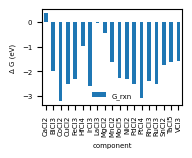

In [23]:
# plot homo-intestine
mpl.rcParams['legend.frameon'] = 'False'
#table_name = np.array(["ari", "jaccard", "purity", "nmi", "fmi","method","precision", "recall"])


plt_df_index = df_rxn.plot(x="component", y=["G_rxn"], kind="bar")
#plt.pyplot.ylabel("abel=u'Δ G (eV)")
save_dir = work_dir + "/energy_of_reaction.pdf"
#mpl.pyplot.legend(bbox_to_anchor=(0, 1.0, 1.0, 0.01), loc="lower left",  ncol=5, columnspacing=0.6, handlelength=0.8)
fig = plt_df_index.get_figure()
fig.set_size_inches(2.0,1.6)
plt_df_index.set_ylabel(u'Δ G (eV)')
mpl.pyplot.subplots_adjust(left=0.2, bottom=0.3, right=0.9, top=0.9)
fig.savefig(save_dir)

